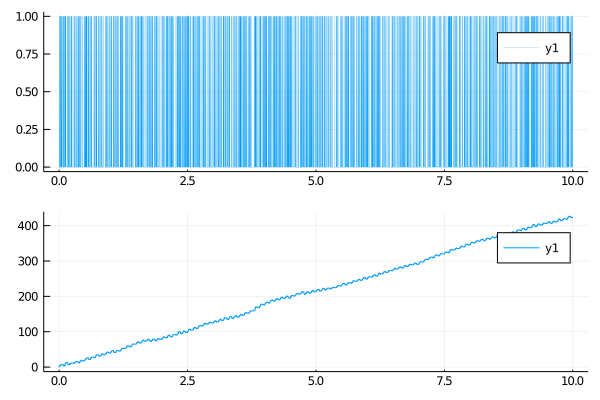

In [38]:
using Plots

mutable struct analizer
    time::Real
    score::Complex

    freq::Real
end
a = analizer(0, 0, 10)

function f(a::analizer, t, val)
    a.score += val * (cos(t * a.freq * 2pi) - im * sin(t * a.freq * 2pi))
end

arr = []
y = []

t = 0:0.001:10

for i in t
    if sin(i * 2pi * 10 + 1) > 0
        w = 1
    else
        w = 0
    end
    val = 0
    if sin(i * 48 * 2pi) * w > 0.9
        val = 1
    end
    
    if rand(Float64) > 0.90
        val = 1
    end
 
    append!(y, val)
    
    if val > 0.3
        f(a, i, 1)
    end

    append!(arr, a.score)
end

sig_plot = plot(t, y, linewidth=.2)
acc_plot = plot(t, abs.(arr))

plot(sig_plot, acc_plot, layout=(2, 1))
#savefig("1.png")